In [59]:
# read in the csv all_results.csv from results folder
# create a df 

import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import mann whitneyu from scipy.stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon


data = pd.read_csv(os.path.join(os.path.dirname("C:/Users/Lea/Documents/MA/Repo/TemporalPatternDetection/"), 'results', 'all_results.csv'))
df = pd.DataFrame(data)
df.head()

,model_name,feature_selection,generalization_test,Task,multiclass,Parameters,classifier,micro_precision,micro_recall,micro_f1,micro_f2,subset_accuracy,hamming_loss
0,XGBoost,all,0,s,0,1.0,1,0.234278,0.321088,0.270879,0.298918,0.574219,0.091942
1,XGBoost,all,1,s,0,1.0,1,0.259457,0.403955,0.315675,0.363181,0.494983,0.115292
2,XGBoost,all,0,f,0,2.0,1,0.233057,0.552795,0.327712,0.433523,0.525191,0.111145
3,XGBoost,all,1,f,0,2.0,1,0.141193,0.194737,0.163126,0.180514,0.526756,0.124972
4,XGBoost,audio,0,s,0,1.0,1,0.118572,0.204082,0.149960,0.178318,0.492622,0.123047


In [60]:
df.describe()

,generalization_test,multiclass,Parameters,classifier,micro_precision,micro_recall,micro_f1,micro_f2,subset_accuracy,hamming_loss
count,136.000000,136.000000,112.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.500000,0.647059,4.375000,1.000000,0.176895,0.211513,0.139320,0.156885,0.545870,0.139995
std,0.501848,0.638626,2.127152,0.421637,0.134478,0.222266,0.095537,0.121891,0.201110,0.164370
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042646
25%,0.000000,0.000000,2.750000,1.000000,0.077605,0.047859,0.070243,0.054906,0.454134,0.067811
50%,0.500000,1.000000,4.500000,1.000000,0.155401,0.136735,0.119643,0.133006,0.603397,0.086076
75%,1.000000,1.000000,6.250000,1.000000,0.240987,0.323058,0.202899,0.235645,0.708555,0.132737
max,1.000000,2.000000,7.000000,2.000000,0.692567,1.000000,0.399843,0.497879,0.797964,0.949911


In [61]:
#I want to do signifcanz tests, the data is not noramlly distributed

# I want to co mapre 1. whether multiclass vs binary classification is better for classsifers
# 2. whetehr multiclass vs binary classification is better for vlms
# 3. whether multiclass vs binary classification is better overall
#4. whetehr xgb boost performs better than rf
#5 whether classifiers perform better than vlms
# 6. also ehwther there was a relevant dropoff in performance in genralization tasks

# first create dataframe without the feature selection to comapre classifiers and vlms
# this means feature-selection is either 'all' or has no value
df_no_fs = df[(df['feature_selection'] == 'all') | (df['feature_selection'].isnull())]
df_no_fs = df_no_fs.drop(columns=['feature_selection'])
df_no_fs.head()
df_no_fs.describe()

,generalization_test,multiclass,Parameters,classifier,micro_precision,micro_recall,micro_f1,micro_f2,subset_accuracy,hamming_loss
count,40.00000,40.000000,16.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.50000,1.000000,4.375000,1.000000,0.130453,0.250057,0.113555,0.137737,0.507073,0.214525
std,0.50637,0.784465,2.187083,0.784465,0.130866,0.309916,0.103073,0.126713,0.266493,0.277568
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050089
25%,0.00000,0.000000,2.750000,0.000000,0.044185,0.018622,0.025717,0.020907,0.456458,0.066729
50%,0.50000,1.000000,4.500000,1.000000,0.063418,0.112804,0.103406,0.122104,0.607302,0.088009
75%,1.00000,2.000000,6.250000,2.000000,0.233362,0.415555,0.155344,0.209241,0.702790,0.139382
max,1.00000,2.000000,7.000000,2.000000,0.495248,1.000000,0.364272,0.449430,0.762542,0.949911


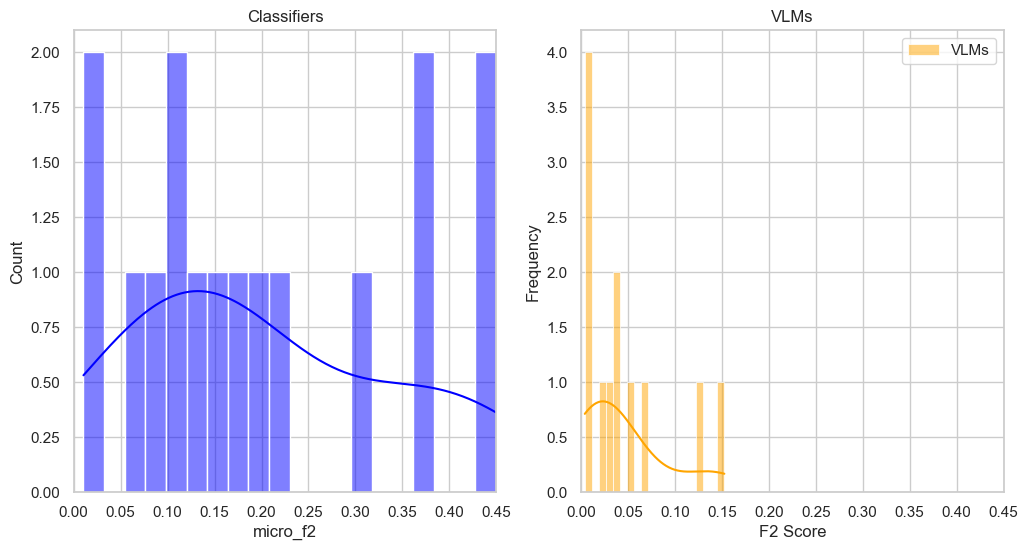

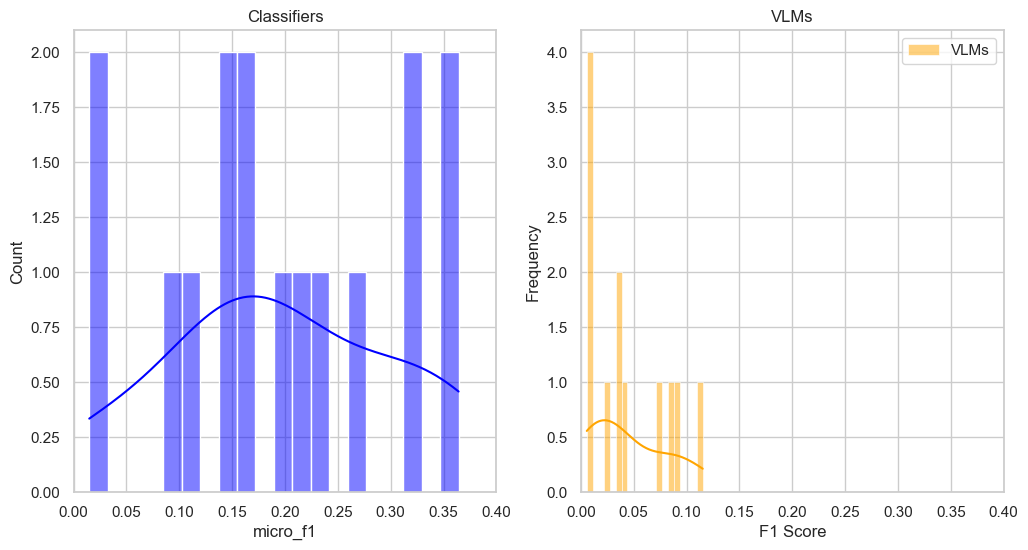

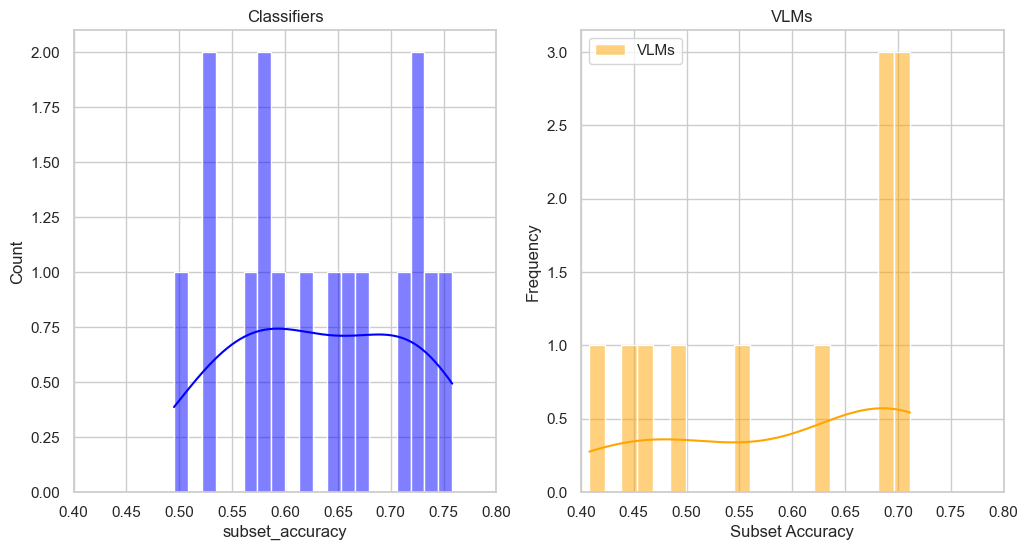

In [62]:
# make a dataframe to comapre vlms vs classifiers, where
#classifiers = ['XGBoost', 'RandomForest'],
#vlms = ['VLM_describe',  'VLM_def', 'VLM_perclass']
#heuristic_bls = ['Baseline-All','Baseline-None', 'Baseline-Random']


# make histrograms for vlms and classifiers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Classifiers')
# make sure both histograms have the same x axis
plt.xlim(0, 0.45)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['XGBoost', 'RandomForest'])]['micro_f2'], bins=20, kde=True, color='blue', label='Classifiers')
plt.subplot(1, 2, 2)
plt.title('VLMs')
plt.xlim(0, 0.45)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['VLM_describe', 'VLM_def', 'VLM_perclass'])]['micro_f2'], bins=20, kde=True, color='orange', label='VLMs')
plt.xlabel('F2 Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(os.path.join(os.path.dirname("C:/Users/Lea/Documents/MA/Repo/TemporalPatternDetection/"), 'results', 'vlms_vs_classifiers_f2.png'))
plt.show()

# also same plot f1 score for classifiers and vlms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Classifiers')
# make sure both histograms have the same x axis
plt.xlim(0, 0.4)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['XGBoost', 'RandomForest'])]['micro_f1'], bins=20, kde=True, color='blue', label='Classifiers')
plt.subplot(1, 2, 2)
plt.title('VLMs')
plt.xlim(0, 0.4)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['VLM_describe', 'VLM_def', 'VLM_perclass'])]['micro_f1'], bins=20, kde=True, color='orange', label='VLMs')
plt.xlabel('F1 Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(os.path.join(os.path.dirname("C:/Users/Lea/Documents/MA/Repo/TemporalPatternDetection/"), 'results', 'vlms_vs_classifiers_f1.png'))

# another one for subset_accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Classifiers')
# make sure both histograms have the same x axis
plt.xlim(0.4, 0.8)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['XGBoost', 'RandomForest'])]['subset_accuracy'], bins=20, kde=True, color='blue', label='Classifiers')
plt.subplot(1, 2, 2)
plt.title('VLMs')
plt.xlim(0.4, 0.8)
sns.histplot(df_no_fs[df_no_fs['model_name'].isin(['VLM_describe', 'VLM_def', 'VLM_perclass'])]['subset_accuracy'], bins=20, kde=True, color='orange', label='VLMs')
plt.xlabel('Subset Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(os.path.join(os.path.dirname("C:/Users/Lea/Documents/MA/Repo/TemporalPatternDetection/"), 'results', 'vlms_vs_classifiers_subset_accuracy.png'))


In [68]:
# keine normalverteilung, also mann whitneyu test
# first for f2 score
classifiers_f2 = df_no_fs[df_no_fs['model_name'].isin(['XGBoost', 'RandomForest'])]
vlms_f2 = df_no_fs[df_no_fs['model_name'].isin(['VLM_describe', 'VLM_def', 'VLM_perclass'])]

# do mann whitneyu test for classifiers vs vlms on micro_f1, micro_f2 and subset_accuracy

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    classifiers_data = classifiers_f2[metric].values
    vlms_data = vlms_f2[metric].values
    # do the mann whitneyu test
    statistic, pvalue = mannwhitneyu(classifiers_data, vlms_data)
    print (f'Mann Whitney U test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')

    significant = pvalue < 0.05
    if significant:
        print(f'The difference is significant for {metric} between classifiers and vlms')

# do wilcoxon test for classifiers vs vlms on micro_f1, micro_f2 and subset_accuracy

    # append the results to the dataframe
    
    
    



Mann Whitney U test for micro_precision between classifiers and vlms: statistic = 180.0, pvalue = 0.00010601762559383997
The difference is significant for micro_precision between classifiers and vlms
Mann Whitney U test for micro_recall between classifiers and vlms: statistic = 163.0, pvalue = 0.0020148797875111143
The difference is significant for micro_recall between classifiers and vlms
Mann Whitney U test for micro_f1 between classifiers and vlms: statistic = 174.0, pvalue = 0.0003208620469872013
The difference is significant for micro_f1 between classifiers and vlms
Mann Whitney U test for micro_f2 between classifiers and vlms: statistic = 167.0, pvalue = 0.0010645753794782135
The difference is significant for micro_f2 between classifiers and vlms
Mann Whitney U test for subset_accuracy between classifiers and vlms: statistic = 112.0, pvalue = 0.4717901363333026
Mann Whitney U test for hamming_loss between classifiers and vlms: statistic = 80.0, pvalue = 0.4717901363333026


In [96]:
# nextw e do xgb vs rf, here we include feature tests to have more samples
xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')

# teh trend was the same across multiclass and perclass scenarios
    
print('----------------------------------------------------------------------')
print('without feature tests')
xgb_df = df_no_fs[df_no_fs['model_name'] == 'XGBoost']
rf_df = df_no_fs[df_no_fs['model_name'] == 'RandomForest']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')


Wilcoxon test for micro_precision between classifiers and vlms: statistic = 409.0, pvalue = 0.001508175304176142
The difference in micro_precision between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for micro_recall between classifiers and vlms: statistic = 402.0, pvalue = 0.002047147131871964
The difference in micro_recall between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for micro_f1 between classifiers and vlms: statistic = 794.0, pvalue = 0.9739709716078592
Wilcoxon test for micro_f2 between classifiers and vlms: statistic = 557.0, pvalue = 0.04931509102884686
The difference in micro_f2 between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for subset_accuracy between classifiers and vlms: statistic = 167.5, pvalue = 2.702947515980029e-07
The difference in subset_accuracy between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for hamming_loss

In [97]:
xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']
xgb_df = xgb_df[xgb_df['Task'] == 's']
rf_df = rf_df[rf_df['Task'] == 's']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')

xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']
xgb_df = xgb_df[xgb_df['Task'] == 'f']
rf_df = rf_df[rf_df['Task'] == 'f']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')


Wilcoxon test for micro_precision between classifiers and vlms: statistic = 30.0, pvalue = 1.5139579772949219e-05
The difference in micro_precision between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for micro_recall between classifiers and vlms: statistic = 38.0, pvalue = 4.830211400985718e-05
The difference in micro_recall between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for micro_f1 between classifiers and vlms: statistic = 188.0, pvalue = 0.7450922578573227
Wilcoxon test for micro_f2 between classifiers and vlms: statistic = 78.0, pvalue = 0.003438994288444519
The difference in micro_f2 between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for subset_accuracy between classifiers and vlms: statistic = 1.0, pvalue = 1.4901161193847656e-08
The difference in subset_accuracy between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for hamming_loss

In [98]:
xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']
xgb_df = xgb_df[xgb_df['generalization_test'] == 0]
rf_df = rf_df[rf_df['generalization_test'] == 0]


for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')

print('----------------------------------------------------------------------')

xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']
xgb_df = xgb_df[xgb_df['generalization_test'] == 1]
rf_df = rf_df[rf_df['generalization_test'] == 1]

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')


Wilcoxon test for micro_precision between classifiers and vlms: statistic = 114.0, pvalue = 0.042608387768268585
The difference in micro_precision between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for micro_recall between classifiers and vlms: statistic = 151.0, pvalue = 0.2450956031680107
Wilcoxon test for micro_f1 between classifiers and vlms: statistic = 181.0, pvalue = 0.6295278295874596
Wilcoxon test for micro_f2 between classifiers and vlms: statistic = 185.0, pvalue = 0.6947018131613731
Wilcoxon test for subset_accuracy between classifiers and vlms: statistic = 39.0, pvalue = 5.529820919036865e-05
The difference in subset_accuracy between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for hamming_loss between classifiers and vlms: statistic = 29.0, pvalue = 1.2949109077453613e-05
The difference in hamming_loss between classifiers and vlms is significant, with XGBoost being better.
----------------------

In [108]:
multi_df = df[df['multiclass'] == 1]
per_class_df = df[df['multiclass'] == 0]

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = multi_df[metric].values
    rf_data = per_class_df[metric].values

    
    statistic, pvalue = mannwhitneyu(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    
    better_scenario = 'multiclass' if np.mean(xgb_data) > np.mean(rf_data) else 'perclass'

    significance = True if pvalue < 0.05 else False
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_scenario = 'multiclass' if np.mean(xgb_data) > np.mean(rf_data) else 'perclass'
    else:
        better_scenario = 'perclass' if np.mean(xgb_data) > np.mean(rf_data) else 'multiclass'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_scenario} being better.')

print('----------------------------------------------------------------------')
# without vlms

multi_df = multi_df[multi_df['model_name'].isin(['XGBoost', 'RandomForest'])]
per_class_df = per_class_df[per_class_df['model_name'].isin(['XGBoost', 'RandomForest'])]	

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = multi_df[metric].values
    rf_data = per_class_df[metric].values

    
    statistic, pvalue = mannwhitneyu(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    
    better_scenario = 'multiclass' if np.mean(xgb_data) > np.mean(rf_data) else 'perclass'

    significance = True if pvalue < 0.05 else False
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_scenario = 'multiclass' if np.mean(xgb_data) > np.mean(rf_data) else 'perclass'
    else:
        better_scenario = 'perclass' if np.mean(xgb_data) > np.mean(rf_data) else 'multiclass'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_scenario} being better.')



Wilcoxon test for micro_precision between classifiers and vlms: statistic = 2211.0, pvalue = 0.1463626291753524
Wilcoxon test for micro_recall between classifiers and vlms: statistic = 195.5, pvalue = 6.688276830787667e-18
The difference in micro_recall between classifiers and vlms is significant, with perclass being better.
Wilcoxon test for micro_f1 between classifiers and vlms: statistic = 625.0, pvalue = 9.639452109898035e-11
The difference in micro_f1 between classifiers and vlms is significant, with perclass being better.
Wilcoxon test for micro_f2 between classifiers and vlms: statistic = 285.0, pvalue = 3.020636997877689e-16
The difference in micro_f2 between classifiers and vlms is significant, with perclass being better.
Wilcoxon test for subset_accuracy between classifiers and vlms: statistic = 3691.0, pvalue = 8.553760492429419e-19
The difference in subset_accuracy between classifiers and vlms is significant, with multiclass being better.
Wilcoxon test for hamming_loss betw

In [ ]:
# nextw e do xgb vs rf, here we include feature tests to have more samples
xgb_df = df[df['model_name'] == 'XGBoost']
rf_df = df[df['model_name'] == 'RandomForest']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')

# teh trend was the same across multiclass and perclass scenarios
    
print('----------------------------------------------------------------------')
print('without feature tests')
xgb_df = df_no_fs[df_no_fs['model_name'] == 'XGBoost']
rf_df = df_no_fs[df_no_fs['model_name'] == 'RandomForest']

for metric in ['micro_precision', 'micro_recall', 'micro_f1', 'micro_f2', 'subset_accuracy', 'hamming_loss']:
    # get the data for classifiers and vlms
    xgb_data = xgb_df[metric].values
    rf_data = rf_df[metric].values

    # we do wilcoxin because they are paired in same scenarios
    statistic, pvalue = wilcoxon(xgb_data, rf_data)
    print (f'Wilcoxon test for {metric} between classifiers and vlms: statistic = {statistic}, pvalue = {pvalue}')
    significance = True if pvalue < 0.05 else False
    diffs = xgb_data - rf_data
    if metric != 'hamming_loss': # hamming loss smaller is better
        better_model = 'XGBoost' if np.median(diffs) > 0 else 'RandomForest'
    else:
        better_model = 'RandomForest' if np.median(diffs) > 0 else 'XGBoost'
    if significance:
        print(f'The difference in {metric} between classifiers and vlms is significant, with {better_model} being better.')


Wilcoxon test for micro_precision between classifiers and vlms: statistic = 409.0, pvalue = 0.001508175304176142
The difference in micro_precision between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for micro_recall between classifiers and vlms: statistic = 402.0, pvalue = 0.002047147131871964
The difference in micro_recall between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for micro_f1 between classifiers and vlms: statistic = 794.0, pvalue = 0.9739709716078592
Wilcoxon test for micro_f2 between classifiers and vlms: statistic = 557.0, pvalue = 0.04931509102884686
The difference in micro_f2 between classifiers and vlms is significant, with XGBoost being better.
Wilcoxon test for subset_accuracy between classifiers and vlms: statistic = 167.5, pvalue = 2.702947515980029e-07
The difference in subset_accuracy between classifiers and vlms is significant, with RandomForest being better.
Wilcoxon test for hamming_loss

In [65]:
xgb_df.head(15)

,model_name,feature_selection,generalization_test,Task,multiclass,Parameters,classifier,micro_precision,micro_recall,micro_f1,micro_f2,subset_accuracy,hamming_loss
0,XGBoost,all,0,s,0,1.0,1,0.234278,0.321088,0.270879,0.298918,0.574219,0.091942
1,XGBoost,all,1,s,0,1.0,1,0.259457,0.403955,0.315675,0.363181,0.494983,0.115292
2,XGBoost,all,0,f,0,2.0,1,0.233057,0.552795,0.327712,0.433523,0.525191,0.111145
3,XGBoost,all,1,f,0,2.0,1,0.141193,0.194737,0.163126,0.180514,0.526756,0.124972
4,XGBoost,audio,0,s,0,1.0,1,0.118572,0.204082,0.149960,0.178318,0.492622,0.123047
5,XGBoost,audio,1,s,0,1.0,1,0.164480,0.269774,0.204065,0.238845,0.453177,0.138610
6,XGBoost,audio,0,f,0,2.0,1,0.087891,0.244306,0.128472,0.178734,0.408651,0.163766
7,XGBoost,audio,1,f,0,2.0,1,0.083588,0.171930,0.111683,0.140924,0.380713,0.175920
8,XGBoost,visual,0,s,0,1.0,1,0.178592,0.341497,0.234515,0.288788,0.496094,0.118490
9,XGBoost,visual,1,s,0,1.0,1,0.128020,0.259887,0.171488,0.215427,0.342809,0.164994


In [66]:
rf_df.head(15)

,model_name,feature_selection,generalization_test,Task,multiclass,Parameters,classifier,micro_precision,micro_recall,micro_f1,micro_f2,subset_accuracy,hamming_loss
28,RandomForest,all,0,s,0,3.0,1,0.242789,0.219048,0.230212,0.223361,0.644531,0.077836
29,RandomForest,all,1,s,0,3.0,1,0.361786,0.368644,0.364272,0.366674,0.580268,0.084077
30,RandomForest,all,0,f,0,4.0,1,0.262712,0.546584,0.354844,0.449430,0.573537,0.097710
31,RandomForest,all,1,f,0,4.0,1,0.183440,0.201754,0.192083,0.197750,0.589744,0.107692
32,RandomForest,audio,0,s,0,3.0,1,0.141301,0.160544,0.150120,0.156153,0.580729,0.096861
33,RandomForest,audio,1,s,0,3.0,1,0.245764,0.266949,0.255899,0.262411,0.526198,0.102100
34,RandomForest,audio,0,f,0,4.0,1,0.119620,0.225673,0.156305,0.191620,0.522646,0.119491
35,RandomForest,audio,1,f,0,4.0,1,0.064484,0.096491,0.077162,0.087645,0.450948,0.146042
36,RandomForest,visual,0,s,0,3.0,1,0.230109,0.323810,0.269027,0.299418,0.578125,0.093533
37,RandomForest,visual,1,s,0,3.0,1,0.116187,0.153955,0.132348,0.144489,0.408584,0.132572
